<a href="https://colab.research.google.com/github/duncankyalo/duncan/blob/main/Python_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMD/UoN Python Training Day - Notes

### Basic code and data types
To test that everything is working for us we can run some basic code.

In [ ]:
# integers and floats
x = 5
print(x)
print(type(x))

5
<class 'int'>


In [ ]:
y = 2.2
print(y)
print(type(y))

2.2
<class 'float'>


In [ ]:
z = x*y
print(z)
print(type(z))


11.0
<class 'float'>


In [ ]:
# strings
kmd = 'best department in Kenya'
print(kmd)
print(type(kmd))


best department in Kenya
<class 'str'>


In [ ]:
# lists
example_of_list =[1,5,6,8]
print(example_of_list)
print(type(example_of_list))

[1, 5, 6, 8]
<class 'list'>


### Install packages
The first step when starting analysis is to install packages. We only need to install a couple of "high level" packages as their dependencies (lower level packages) are installed automatically with them.

In [ ]:
# xarray is used to deal with netCDF data
!pip install xarray
# tephi is used to plot tephigrams
!pip install tephi
# cartopy is used to plot spatial (map) data
!pip install cartopy

### Load packages
Once packages are installed, we must load them into the notebook. This only needs to be done once at the start of the notebook.

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import tephi
import numpy as np

### Load radiosonde data

The first step of data analysis is to read in the data. You can find the correct file path by navigating through the 'Files' option on the left panel.

You will need to "Mount Google Drive" to access your Google Drive directory. You can then navigate through your Google Drive directory to the location you uploaded the data files, e.g "QC_sonde_training_data.nc", click "..." and then "Copy Path".

We then pass this file path as a string to xr.open_dataset()

We can then inspect the output - we are particularly interested in the dimensions and variables.

** Note that this and subsequent file paths will need to be modified for you to successfully run this code **

In [ ]:
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
print(data)

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


This is a test.
<xarray.Dataset>
Dimensions:              (pressure: 820, intended_launchtime: 32)
Coordinates:
  * pressure             (pressure) int64 830 829 828 827 826 ... 15 14 13 12 11
    launchtime           (intended_launchtime) datetime64[ns] ...
  * intended_launchtime  (intended_launchtime) datetime64[ns] 2024-03-01T08:0...
Data variables:
    geopot               (pressure, intended_launchtime) float64 ...
    temperature          (pressure, intended_launchtime) float64 ...
    humidity             (pressure, intended_launchtime) float64 ...
    dewpoint             (pressure, intended_launchtime) float64 ...
    wind_dir             (pressure, intended_launchtime) float64 ...
    wind_speed           (pressure, intended_launchtime) float64 ...
    time                 (pressure, intended_launchtime) datetime64[ns] ...
Attributes:
    Title:             DRYCAB radiosonde
    release_site:      Dagoretti Corner
    lat:               -1.302
    lon:               36.759
 

### Plot radiosonde data (Hovmoller)

We can see the data is 2D. We can go ahead and plot a Hovmoller (time-height) without any data processing.

We just need to select a variable to plot. In this case we plot 'humidity'.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


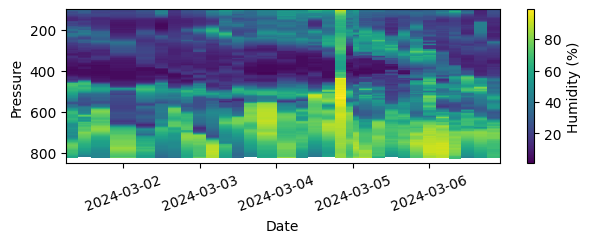

In [ ]:
# read in data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# create figure
fig, ax = plt.subplots(figsize=[7,2])
# plot data
plot = ax.pcolormesh(data['intended_launchtime'], data['pressure'], data['humidity'])
# set y axes limits
ax.set_ylim(850,100)
# add axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Pressure')
# rotate x axis labels 20 degrees
ax.tick_params(axis='x', rotation=20)
# add colorbar
cbar = plt.colorbar(plot, orientation='vertical')
cbar.set_label('Humidity (%)')
# show plot
plt.show()

If we are interested in mid-level humidity, we can change some plot parameters to have a closer look at values there.

Here we specify cmap, vmin, vmax, and change the ylim.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


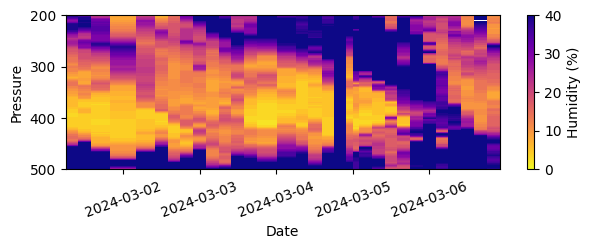

In [ ]:
# read in data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# create figure
fig, ax = plt.subplots(figsize=[7,2])
# plot data
plot = ax.pcolormesh(data['intended_launchtime'], data['pressure'], data['humidity'], cmap='plasma_r', vmin=0, vmax=40)
# set y axis limits
ax.set_ylim(500,200)
# add axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Pressure')
# rotate x axis labels 20 degrees
ax.tick_params(axis='x', rotation=20)
# add colorbar
cbar = plt.colorbar(plot, orientation='vertical')
cbar.set_label('Humidity (%)')
# show plot
plt.show()

### Plot radiosonde data (timeseries)

We can plot timeseries of radiosonde data by selecting a single pressure level from the data

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


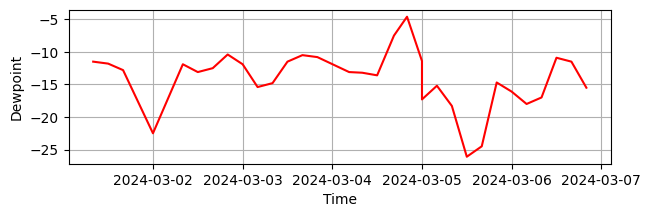

In [ ]:
# open dataset
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# select the 500hPa pressure level
data_500 = data.sel(pressure=500)
# create plot
fig, ax = plt.subplots(figsize=[7,2])
# plot data
ax.plot(data_500['intended_launchtime'], data_500['dewpoint'], color='red', linestyle='-')
# format
ax.set_ylabel('Dewpoint')
ax.set_xlabel('Time')
ax.grid()
# show
plt.show()


### Plot radiosonde data (altitude plot)

We can also plot data from a single radiosonde by specifying a 'intended_launchtime' we are interested in.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


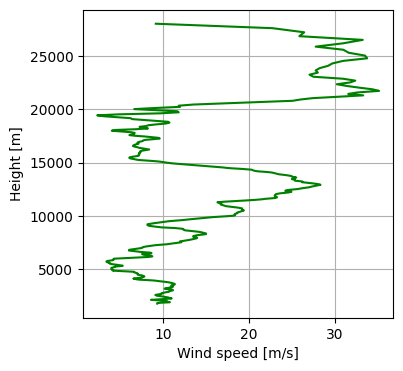

In [ ]:
# load radiosonde data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# create figure
fig, ax = plt.subplots(figsize=[4,4])
# plot data
ax.plot(sonde_data['wind_speed'], sonde_data['geopot'],color='green')
# format
ax.set_ylabel('Height [m]')
ax.set_xlabel('Wind speed [m/s]')
ax.grid()
# show
plt.show()


We can show more than one variable on a single plot by adding a twin axis.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


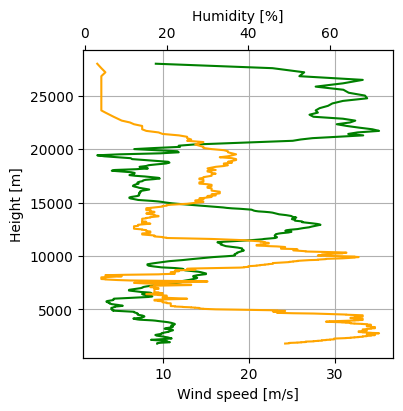

In [ ]:
# load radiosonde data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# create figure
fig, ax = plt.subplots(figsize=[4,4])
# plot data on first axis
ax.plot(sonde_data['wind_speed'], sonde_data['geopot'],color='green')
# add a twin y axis
ax2=ax.twiny()
# plot data on twin y axis
ax2.plot(sonde_data['humidity'], sonde_data['geopot'],color='orange')
# format
ax.set_ylabel('Height [m]')
ax.set_xlabel('Wind speed [m/s]')
ax2.set_xlabel('Humidity [%]')
ax.grid()
# show
plt.show()


### Plot radiosonde data (tephigram plot)

We can plot data from a single radiosonde on a tephigram using the 'tephi' package.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


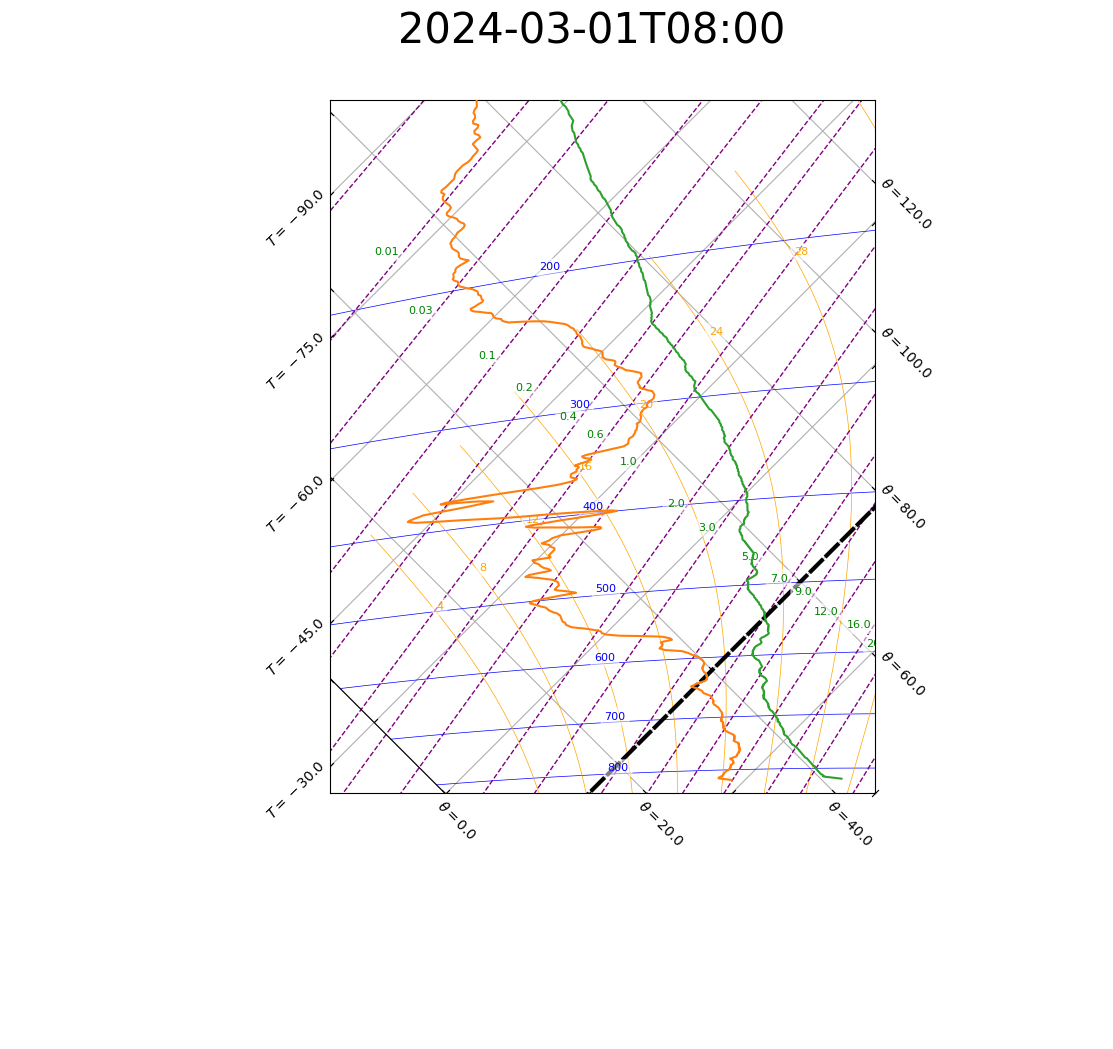

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# select a single radiosonde by 'intended_launchtime'
sonde_data = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# use zip() to contain the data
dewpoint_zip = zip(sonde_data['pressure'], sonde_data['dewpoint'])
temp_zip = zip(sonde_data['pressure'], sonde_data['temperature'])
# add mixing ratio lines
tephi.MIXING_RATIO_LINE.update({'color': 'purple', 'linewidth': 1, 'linestyle': '--'})
# set plot limts
tpg = tephi.Tephigram(anchor=[(850, 30), (100, -100)])
# plot dewpoint
profile = tpg.plot(dewpoint_zip)
# plot temperature
tpg.plot(temp_zip)
# add a title
plt.suptitle('2024-03-01T08:00', fontsize=30)
# show
plt.show()

We can make a more complex plot by adding the data from the previous radiosonde as dotted lines.

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


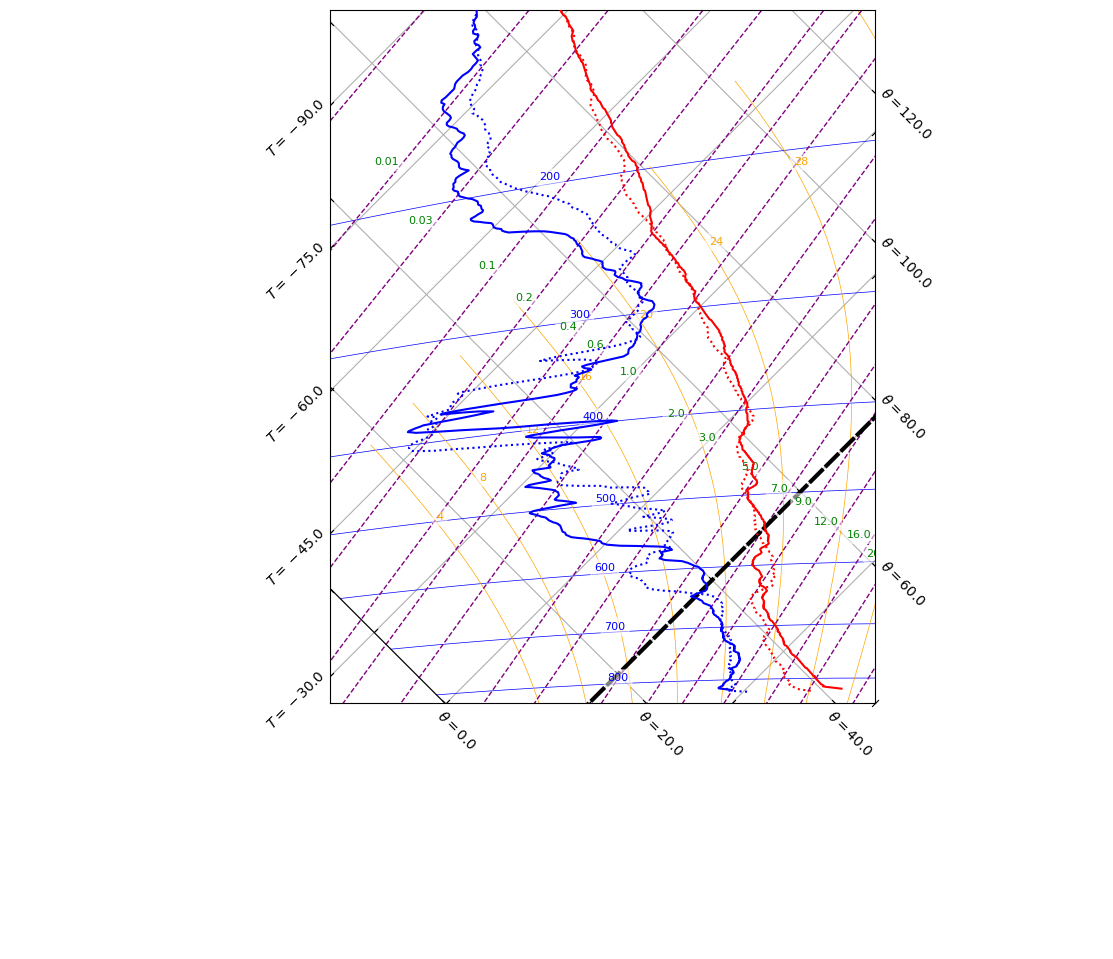

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/QC_sonde_training_data.nc')
# select two radiosondes
sonde_data_1 = data.sel(intended_launchtime='2024-03-05T08:00:00.000000000')
sonde_data_2 = data.sel(intended_launchtime='2024-03-05T12:00:00.000000000')
# zip data for radiosonde 1
dewpoint_zip_1 = zip(sonde_data_1['pressure'], sonde_data_1['dewpoint'])
temp_zip_1 = zip(sonde_data_1['pressure'], sonde_data_1['temperature'])
# zip data for radiosonde 2
dewpoint_zip_2 = zip(sonde_data_2['pressure'], sonde_data_2['dewpoint'])
temp_zip_2 = zip(sonde_data_2['pressure'], sonde_data_2['temperature'])
# create plot
tephi.MIXING_RATIO_LINE.update({'color': 'purple', 'linewidth': 1, 'linestyle': '--'})
tpg = tephi.Tephigram(anchor=[(850, 30), (100, -100)])
# plot radiosonde 1 data
profile = tpg.plot(dewpoint_zip_1, linestyle=':', color='blue')
tpg.plot(temp_zip_1, linestyle=':', color='red')
# plot radiosonde 2 data
profile = tpg.plot(dewpoint_zip_2, color='blue')
tpg.plot(temp_zip_2, color='red')
# show
plt.show()

## Reanalysis data
Reanalysis data is a model-observation hybrid.

One of the most highly regarded reanalysis products is ERA5.

ERA5 data can be downloaded from the Copernicus Climate Data Store.

https://cds.climate.copernicus.eu/cdsapp#!/home


### Extra packages

As reanalysis data is spatial data, we will need to use the Cartopy package for plotting.

We installed this earlier, but we must now import two tools from this package, ccrs and cfeature.

In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Create a map
We can now create a basic map plot.

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


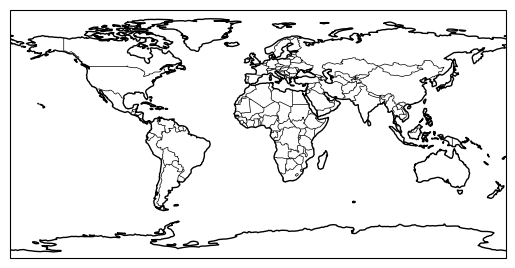

In [ ]:
# create plot with a PlateCarree spatial projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#add coastlines
ax.coastlines()
# add countries
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=0.5, color='black')
# show
plt.show()


### Inspect reanalysis data
We can inspect the reanalysis data with a print statement.

In [ ]:
data=xr.open_dataset('/content/drive/MyDrive/KMD_training_data/era5_pressure_level_data.nc')
print(data)

<xarray.Dataset>
Dimensions:    (longitude: 129, latitude: 105, level: 2, time: 12)
Coordinates:
  * longitude  (longitude) float32 28.0 28.25 28.5 28.75 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -15.5 -15.75 -16.0
  * level      (level) int32 500 750
  * time       (time) datetime64[ns] 2024-03-24 ... 2024-03-25T20:00:00
Data variables:
    q          (time, level, latitude, longitude) float32 ...
    w          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-04-07 11:59:11 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


### Reduce dimensions
We can see from the above output that the data is 4D: Latitude, Longitude, Level and Time are dimensions.

We can only plot 1D or 2D data so we must deal with these extra dimensions if we are to produce a plot. There are many ways to do this, including:

1) data.sel()

2) data.sum()

3) data.mean()

4) data.median()

Here wewill use data.sel() and data.mean().

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/era5_pressure_level_data.nc')
# select only one pressure level
data = data.sel(level=500)
# calculate mean through the time dimension
data = data.mean(dim='time')
# print
print(data)

<xarray.Dataset>
Dimensions:    (longitude: 129, latitude: 105)
Coordinates:
  * longitude  (longitude) float32 28.0 28.25 28.5 28.75 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 10.0 9.75 9.5 9.25 ... -15.5 -15.75 -16.0
    level      int32 500
Data variables:
    q          (latitude, longitude) float32 0.001174 0.0012 ... 0.004939
    w          (latitude, longitude) float32 -0.001855 -0.005435 ... -0.01884


We can now see the data is 2D, with two variables (q: specific humidity, w: vertical velocity)

### Plot data
We can start with a basic plot of the data available

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


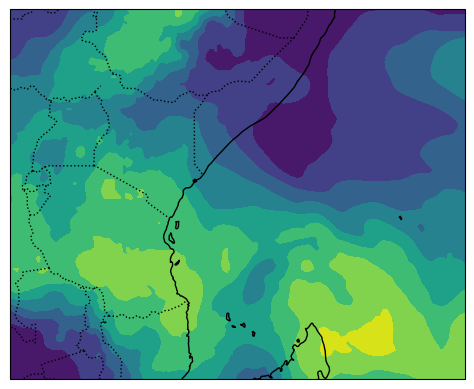

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/era5_pressure_level_data.nc')
# select only one pressure level
data = data.sel(level=500)
# calculate mean through the time dimension
data = data.mean(dim='time')
# create figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#add coastlines and countries
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, color='black')
# plot data
plot = ax.contourf(data['longitude'], data['latitude'], data['q'], transform=ccrs.PlateCarree())
# show
plt.show()



### Plot formatting
We can now focus on Kenya and format our plot by adding axis labels

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


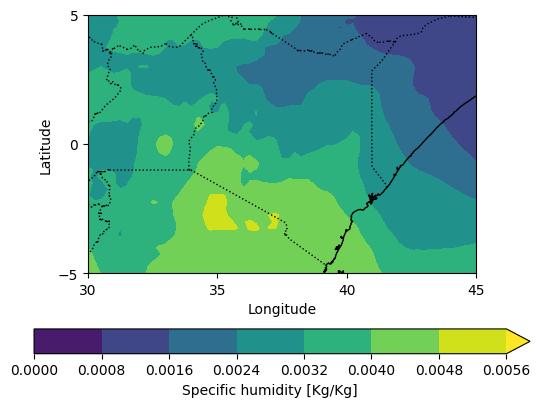

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/era5_pressure_level_data.nc')
# select only one pressure level
data = data.sel(level=500)
# calculate mean through the time dimension
data = data.mean(dim='time')
# create figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#add coastlines and countries
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, color='black')
# plot data
plot = ax.contourf(data['longitude'], data['latitude'], data['q'], transform=ccrs.PlateCarree(), extend='max', cmap='viridis')
# format axes
ax.set_xticks(np.arange(30,50,5))
ax.set_yticks(np.arange(-5,10,5))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# set axis extent
ax.set_extent([30,45,-5,5])
# add a colorbar
cbar = plt.colorbar(plot, orientation='horizontal')
cbar.set_label('Specific humidity [Kg/Kg]')
# show
plt.show()


### Plot for vertical velocity
We can also plot 'w', vertical velocity, define contour_levels, and choose a divergent colorbar (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


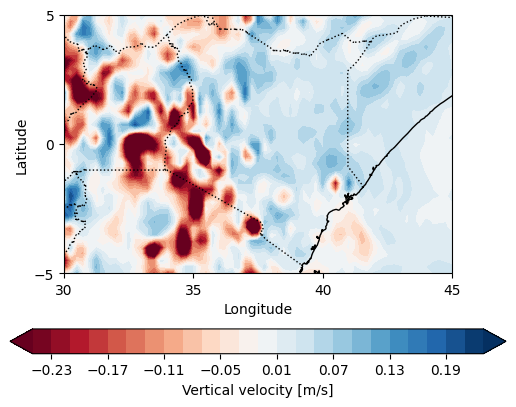

In [ ]:
# load data
data = xr.open_dataset('/content/drive/MyDrive/KMD_training_data/era5_pressure_level_data.nc')
# select only one pressure level
data = data.sel(level=500)
# calculate mean through the time dimension
data = data.mean(dim='time')
# create figure
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
#add coastlines and countries
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, color='black')
# plot data
contour_levels = np.arange(-0.25,0.25,0.02)
plot = ax.contourf(data['longitude'], data['latitude'], data['w'], levels=contour_levels, transform=ccrs.PlateCarree(), extend='both', cmap=plt.cm.RdBu)
# format axes
ax.set_xticks(np.arange(30,50,5))
ax.set_yticks(np.arange(-5,10,5))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# set axis extent
ax.set_extent([30,45,-5,5])
# add a colorbar
cbar = plt.colorbar(plot, orientation='horizontal')
cbar.set_label('Vertical velocity [m/s]')
# show
plt.show()

